# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score,confusion_matrix,f1_score

# 2. Data Preprocessing

1. Reading Dataset

In [2]:
data=pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


2. Dealing with Missing values

In [4]:
data.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

3. Categorical Data to Numerical data

In [7]:
cat=pd.get_dummies(data['cbwd'],drop_first=False)
data=pd.concat([data,cat],axis=1)

In [8]:
data.drop(['cbwd','No'],inplace=True,axis=1)

In [9]:
data.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
24,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0


4. Train Test Split

In [10]:

y=data['pm2.5']
x=data.drop('pm2.5',axis=True)
y.head()

24    129.0
25    148.0
26    159.0
27    181.0
28    138.0
Name: pm2.5, dtype: float64

In [11]:
x.head()

,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
24,2010,1,2,0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
25,2010,1,2,1,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
26,2010,1,2,2,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
27,2010,1,2,3,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
28,2010,1,2,4,-7,-5.0,1022.0,6.25,2,0,0,0,1,0


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

5. Scaling

In [13]:
s=StandardScaler()
x_train_new=s.fit_transform(x_train)
x_test_new=s.transform(x_test)

# 3. EDA

In [14]:
data.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,2012.042771,6.513758,15.685514,11.502311,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866,0.113897,0.322916,0.348995,0.214192
std,1.415311,3.454199,8.785539,6.924848,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165,0.317690,0.467596,0.476658,0.410265
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.000000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,12.000000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,18.000000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000,1.000000,1.000000,1.000000,1.000000


2. Correlation matrix

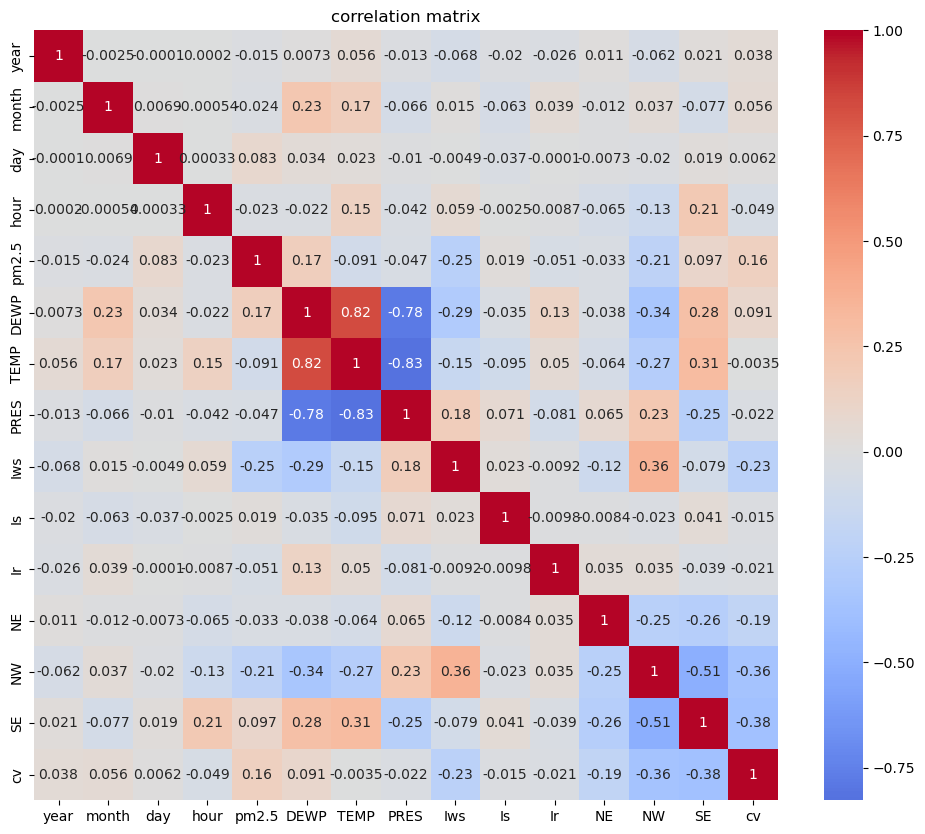

In [15]:
correlation_matrix=data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0)
plt.title('correlation matrix')
plt.show()

2. Data Visualisation

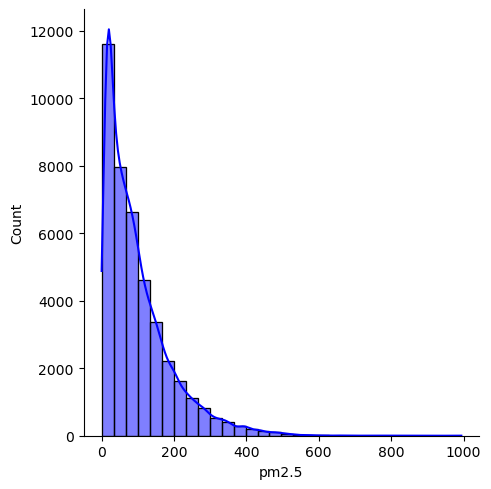

In [16]:
sns.displot(data['pm2.5'],kde=True,color='blue',bins=30)

# 4. ML Models 

RIDGE REGRESSOR

In [17]:
model = Ridge(alpha = 0.5, normalize = False, tol = 0.001, \
              solver ='auto', random_state = 42)
model.fit(x_train_new, y_train)
  
# predicting the y_test
y_pred = model.predict(x_test_new)

C:\Users\SHIVAM\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Random Forest Regressor

In [18]:
regressor = RandomForestRegressor(n_estimators=100,random_state=0)

# fit the regressor with x and y data
regressor.fit(x_train_new, y_train)
y_pred2=regressor.predict(x_test_new)

# 5. Model Evaluation

Random Forest regressor 

In [19]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

print("Random Forest Reressor Prediction details: \n")
print("MAE  :",mae(y_test,y_pred2))
print("MSE  :",mse(y_test,y_pred2))
print("RMSE :",sqrt(mse(y_test,y_pred2)))

Random Forest Reressor Prediction details: 

MAE  : 22.609297892720306
MSE  : 1426.4370301245208
RMSE : 37.76820130909759


Ridge Regressor 

In [20]:
print("Ridge Reressor Prediction details: \n")
print("MAE  :",mae(y_test,y_pred))
print("MSE  :",mse(y_test,y_pred))
print("RMSE :",sqrt(mse(y_test,y_pred)))

Ridge Reressor Prediction details: 

MAE  : 56.83236608899998
MSE  : 6325.424572585211
RMSE : 79.53253782311495


##  CROSS VALIDATION

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
scores1 = cross_val_score(regressor, x_train_new, y_train, cv=5)
scores1

array([0.82810656, 0.79136864, 0.82249368, 0.83696747, 0.82745413])

In [23]:
scores1 = cross_val_score(model, x_train_new, y_train, cv=5)
scores1

C:\Users\SHIVAM\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\SHIVAM\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\SHIVAM\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2

array([0.27714501, 0.26221023, 0.28403849, 0.27984865, 0.2736911 ])